In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
disease2=pd.read_csv("/content/drive/MyDrive/oasis_longitudinal.csv")
disease2

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


In [ ]:
!pip install missingno

<Axes: >

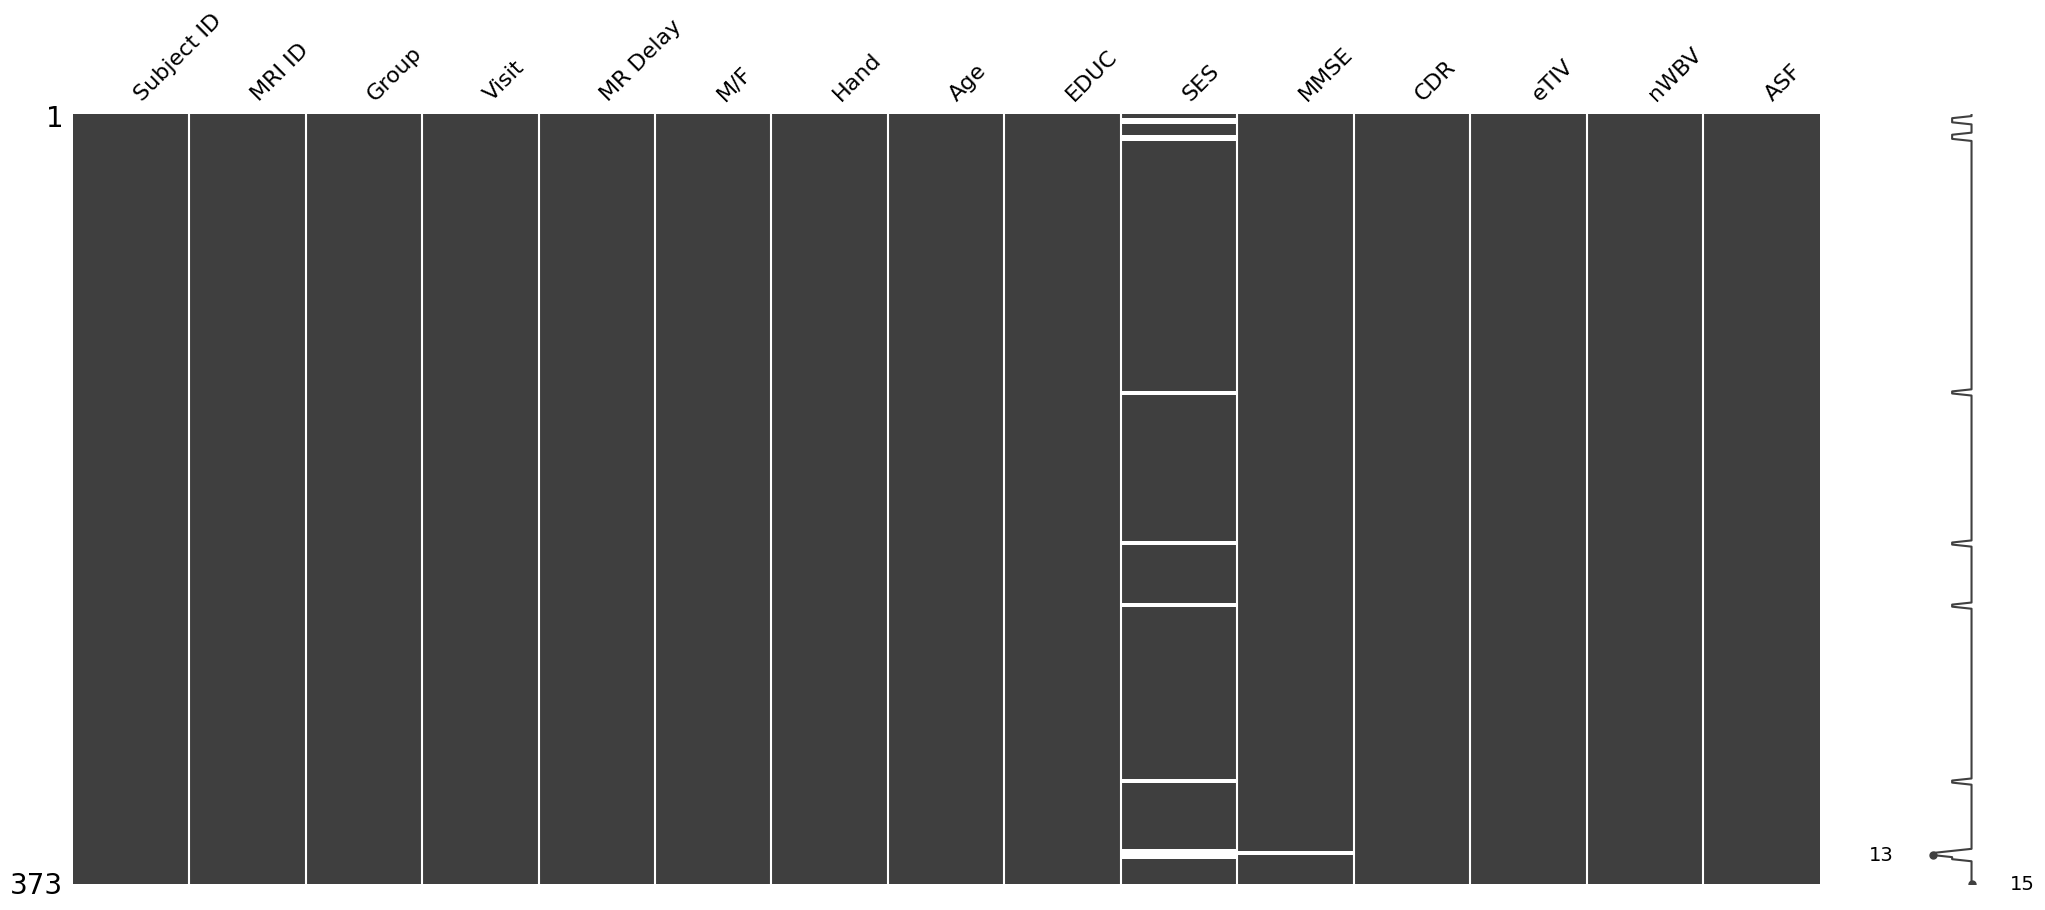

In [ ]:
import missingno as ms
ms.matrix(disease2)

In [ ]:
disease2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373 entries, 0 to 372
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Subject ID  373 non-null    object 
 1   MRI ID      373 non-null    object 
 2   Group       373 non-null    object 
 3   Visit       373 non-null    int64  
 4   MR Delay    373 non-null    int64  
 5   M/F         373 non-null    object 
 6   Hand        373 non-null    object 
 7   Age         373 non-null    int64  
 8   EDUC        373 non-null    int64  
 9   SES         354 non-null    float64
 10  MMSE        371 non-null    float64
 11  CDR         373 non-null    float64
 12  eTIV        373 non-null    int64  
 13  nWBV        373 non-null    float64
 14  ASF         373 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 43.8+ KB


In [ ]:
disease2.isnull().any()

Subject ID    False
MRI ID        False
Group         False
Visit         False
MR Delay      False
M/F           False
Hand          False
Age           False
EDUC          False
SES            True
MMSE           True
CDR           False
eTIV          False
nWBV          False
ASF           False
dtype: bool

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
sm=SimpleImputer(strategy="median")
lbl=LabelEncoder()

<Axes: xlabel='SES', ylabel='Count'>

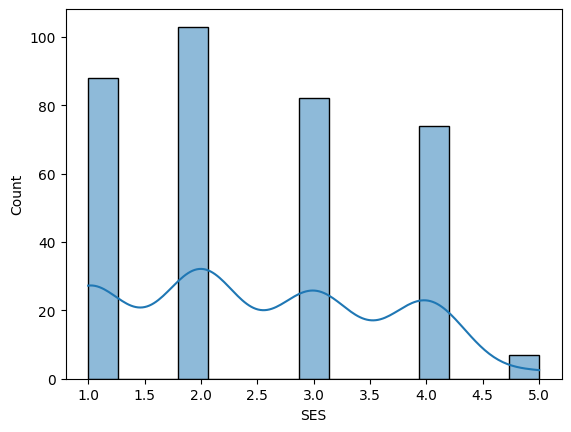

In [ ]:
sns.histplot(data=disease2,x="SES",kde=True)

<Axes: xlabel='MMSE', ylabel='Count'>

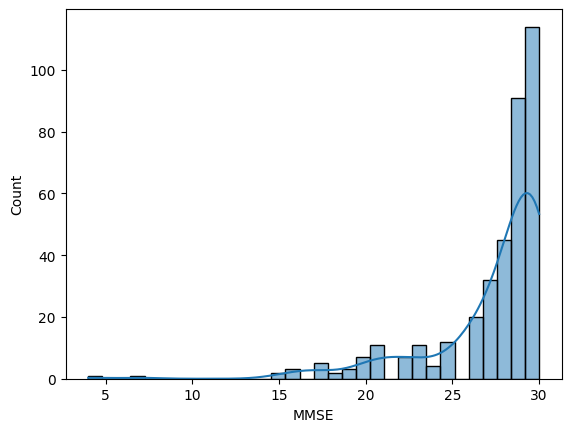

In [ ]:
sns.histplot(data=disease2,x="MMSE",kde=True)

In [ ]:
sm=SimpleImputer(strategy='median')
disease2['SES']=sm.fit_transform(disease2[['SES']])
disease2['MMSE']=sm.fit_transform(disease2[['MMSE']])

In [ ]:
disease2['Group']=lbl.fit_transform(disease2['Group'])


In [ ]:
print(disease2['Group'].unique())  # Check unique values


[2 1 0]


In [ ]:
print(disease2.dtypes)

Subject ID     object
MRI ID         object
Group           int64
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object


In [ ]:
disease2.isnull().sum()

Subject ID    0
MRI ID        0
Group         0
Visit         0
MR Delay      0
M/F           0
Hand          0
Age           0
EDUC          0
SES           0
MMSE          0
CDR           0
eTIV          0
nWBV          0
ASF           0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

try:
    disease2['Group'] = label_encoder.fit_transform(disease2['Group'])
except Exception as e:
    print("Error occurred during label encoding:", e)


In [ ]:
disease2.corr()

<ipython-input-17-ba50142dff2d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  disease2.corr()


,Group,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
Group,1.000000,0.048434,0.049262,-0.049267,0.100606,0.066154,0.338224,-0.572518,0.056693,0.258093,-0.042848
Visit,0.048434,1.000000,0.920009,0.183213,0.024615,-0.049294,-0.027381,0.002325,0.117428,-0.126682,-0.120399
MR Delay,0.049262,0.920009,1.000000,0.205357,0.051630,-0.026247,0.066619,-0.062915,0.119624,-0.105586,-0.123545
Age,-0.049267,0.183213,0.205357,1.000000,-0.027886,-0.045410,0.055255,-0.026257,0.042348,-0.518359,-0.035067
EDUC,0.100606,0.024615,0.051630,-0.027886,1.000000,-0.691222,0.192158,-0.153121,0.257015,-0.012200,-0.241752
SES,0.066154,-0.049294,-0.026247,-0.045410,-0.691222,1.000000,-0.139943,0.052313,-0.249030,0.092361,0.240831
MMSE,0.338224,-0.027381,0.066619,0.055255,0.192158,-0.139943,1.000000,-0.674876,-0.036234,0.342189,0.044960
CDR,-0.572518,0.002325,-0.062915,-0.026257,-0.153121,0.052313,-0.674876,1.000000,0.022819,-0.344819,-0.029340
eTIV,0.056693,0.117428,0.119624,0.042348,0.257015,-0.249030,-0.036234,0.022819,1.000000,-0.210122,-0.988877
nWBV,0.258093,-0.126682,-0.105586,-0.518359,-0.012200,0.092361,0.342189,-0.344819,-0.210122,1.000000,0.213476


In [ ]:
disease2.describe()

,Group,Visit,MR Delay,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,1.410188,1.882038,595.104558,77.013405,14.597855,2.436997,27.351206,0.290885,1488.128686,0.729568,1.195461
std,0.664461,0.922843,635.485118,7.640957,2.876339,1.109307,3.675329,0.374557,176.139286,0.037135,0.138092
min,0.000000,1.000000,0.000000,60.000000,6.000000,1.000000,4.000000,0.000000,1106.000000,0.644000,0.876000
25%,1.000000,1.000000,0.000000,71.000000,12.000000,2.000000,27.000000,0.000000,1357.000000,0.700000,1.099000
50%,2.000000,2.000000,552.000000,77.000000,15.000000,2.000000,29.000000,0.000000,1470.000000,0.729000,1.194000
75%,2.000000,2.000000,873.000000,82.000000,16.000000,3.000000,30.000000,0.500000,1597.000000,0.756000,1.293000
max,2.000000,5.000000,2639.000000,98.000000,23.000000,5.000000,30.000000,2.000000,2004.000000,0.837000,1.587000


<ipython-input-19-efd80bef5c50>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(disease2.corr(),cmap='coolwarm',fmt='.2f')


<Axes: >

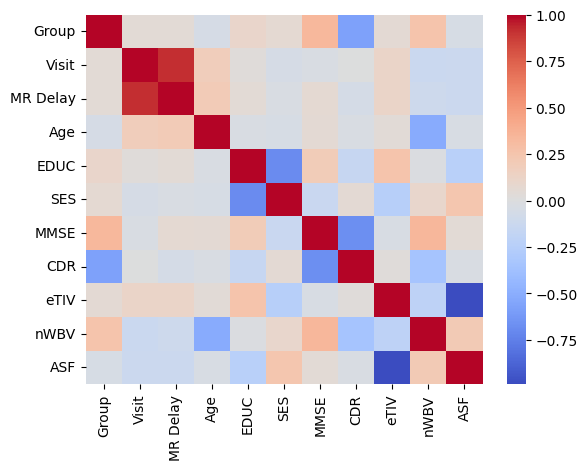

In [ ]:
sns.heatmap(disease2.corr(),cmap='coolwarm',fmt='.2f')

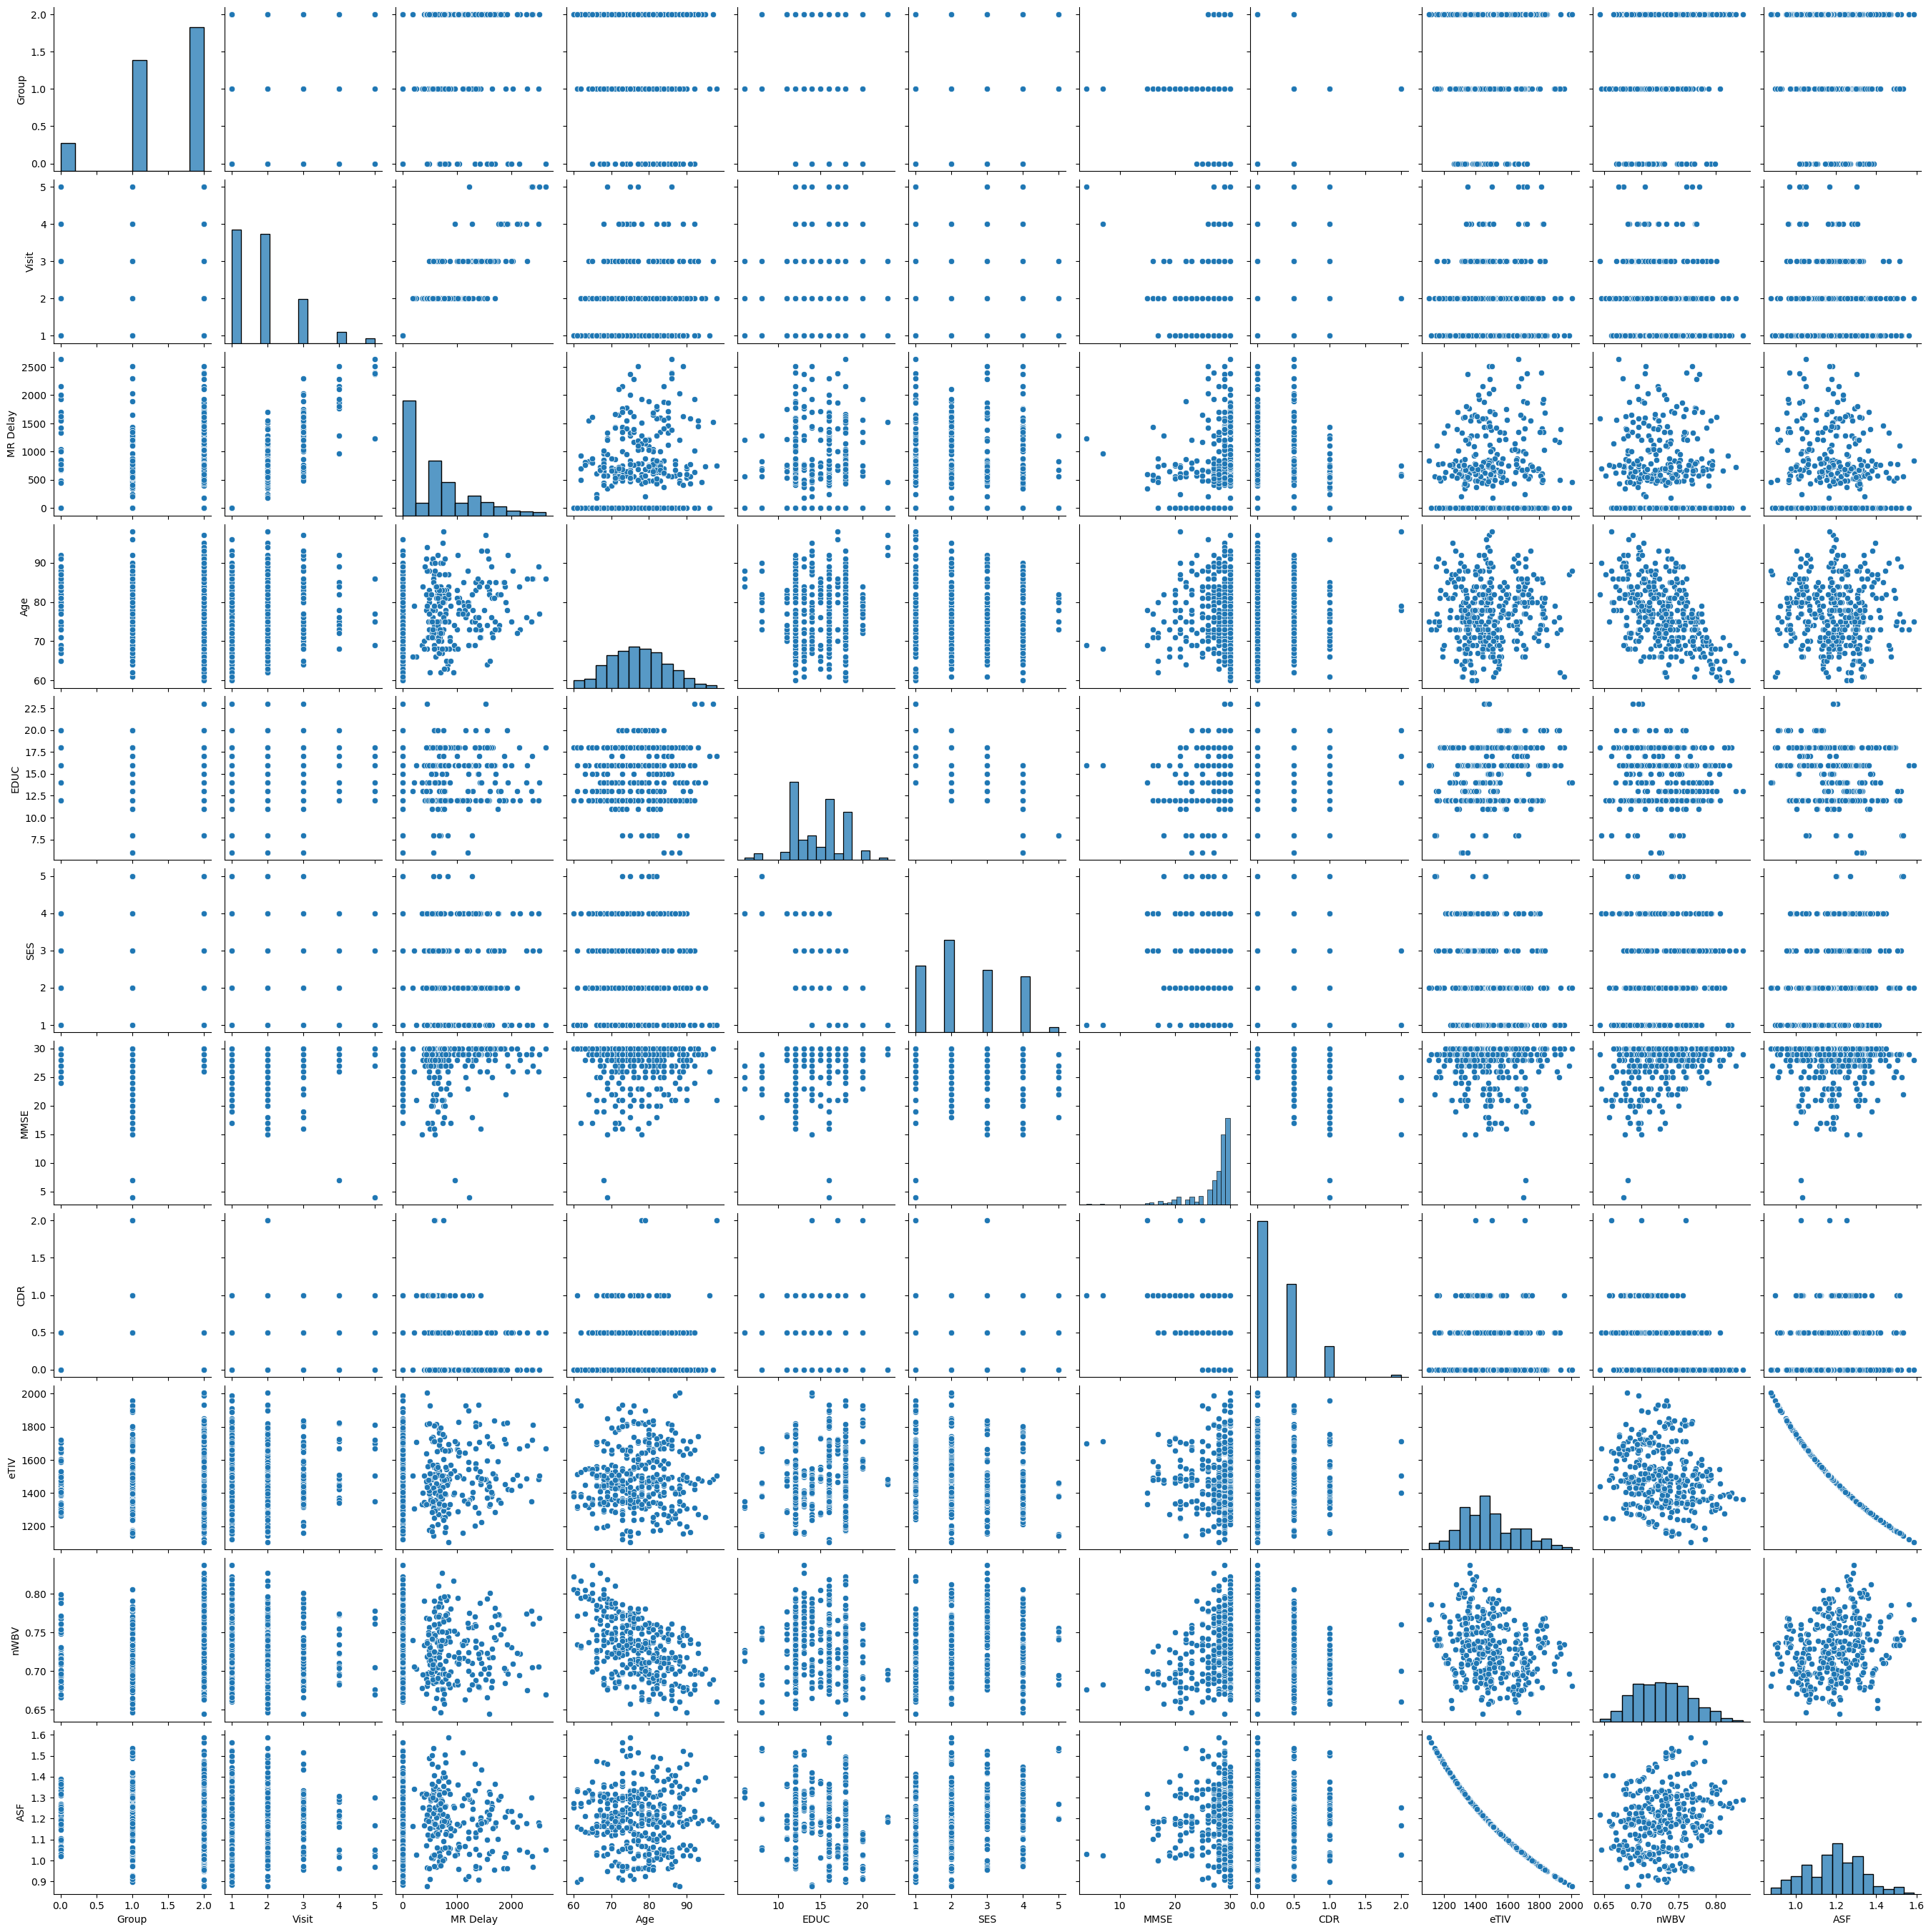

In [ ]:
sns.pairplot(disease2)

In [ ]:
print(disease2.dtypes)

Subject ID     object
MRI ID         object
Group           int64
Visit           int64
MR Delay        int64
M/F            object
Hand           object
Age             int64
EDUC            int64
SES           float64
MMSE          float64
CDR           float64
eTIV            int64
nWBV          float64
ASF           float64
dtype: object


In [ ]:
import pandas as pd

# Assuming df is your DataFrame
# Convert int64 columns to float
int64_columns = disease2.select_dtypes(include=['int64']).columns
disease2[int64_columns] = disease2[int64_columns].astype(float)


#Correlation analysis

In [ ]:
# Select relevant features
selected_features = ['Age', 'CDR', 'nWBV', 'ASF', 'MMSE']
# Calculate correlation matrix
correlation_matrix = disease2[selected_features].corr()


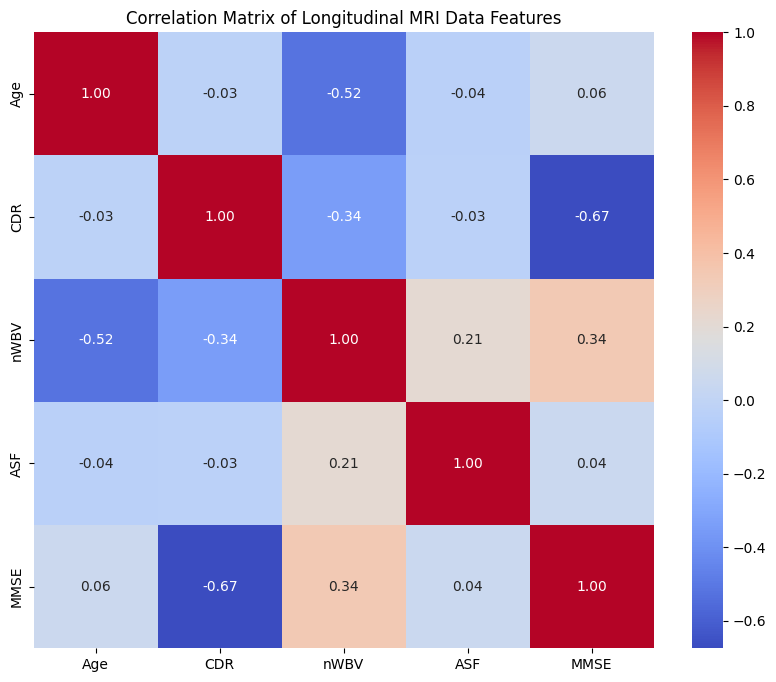

In [ ]:
#visualizing the correlation data
import seaborn as sns
import matplotlib.pyplot as plt

# Create a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Longitudinal MRI Data Features')
plt.show()


In [ ]:
disease2.head()

,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,2.0,1.0,0.0,M,R,87.0,14.0,2.0,27.0,0.0,1987.0,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,2.0,2.0,457.0,M,R,88.0,14.0,2.0,30.0,0.0,2004.0,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,1.0,1.0,0.0,M,R,75.0,12.0,2.0,23.0,0.5,1678.0,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,1.0,2.0,560.0,M,R,76.0,12.0,2.0,28.0,0.5,1738.0,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,1.0,3.0,1895.0,M,R,80.0,12.0,2.0,22.0,0.5,1698.0,0.701,1.034


##Regression analysis

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# Prepare features and target variable
X = disease2[['Age','CDR', 'EDUC', 'SES', 'eTIV', 'nWBV']]
y = disease2['Group']

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)
print("Coefficients:", model.coef_)


Coefficients: [-1.93895653e-03 -9.65200155e-01  3.08134511e-02  1.22739930e-01
  3.77084948e-04  1.12064517e+00]


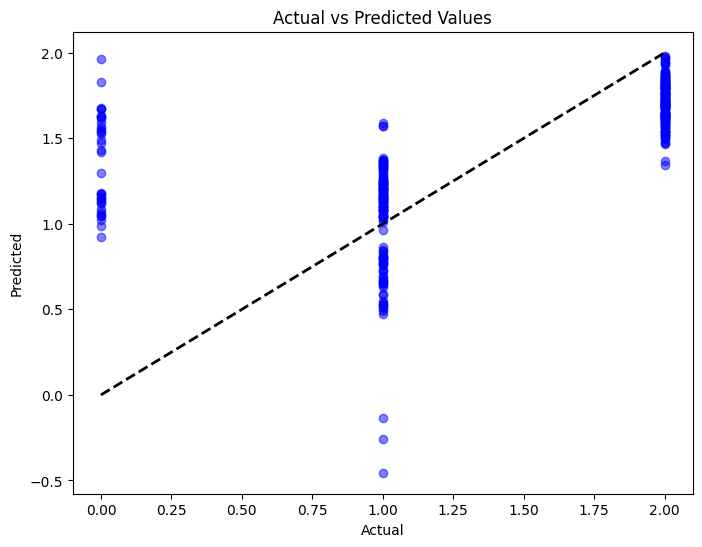

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Predictions from the model
linear_pred = model.predict(X)

# Plot actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y, linear_pred, color='blue', alpha=0.5)  # Scatter plot for actual vs predicted
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Diagonal line for perfect prediction
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()


#Machine Learning Classification

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest classifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Predict and evaluate
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


Accuracy: 0.8533333333333334


#Group Comparison Analysis

Use features like Group and Class to compare brain connectivity patterns between different clinical groups (e.g., AD patients vs. healthy controls).

Perform statistical tests (e.g., t-tests) to identify significant differences in connectivity metrics between groups.

This analysis helps understand how brain connectivity differs between individuals with Alzheimer's disease and healthy individuals.

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Filter data for structural analysis
structural_data = disease2[['MMSE', 'CDR', 'nWBV', 'Group']]

# Perform t-tests between groups for each structural feature
group0_data = structural_data[structural_data['Group'] == 0]  # converted
group1_data = structural_data[structural_data['Group'] == 1]  # Demented
group2_data = structural_data[structural_data['Group'] == 2]  # nondemented

for feature in ['MMSE', 'CDR', 'nWBV']:
    t_stat, p_value = ttest_ind(group0_data[feature], group1_data[feature])
    print(f"T-statistic for NonDemented vs Demented ({feature}): {t_stat}, p-value: {p_value}")

    t_stat, p_value = ttest_ind(group0_data[feature], group2_data[feature])
    print(f"T-statistic for NonDemented vs Converted ({feature}): {t_stat}, p-value: {p_value}")

    t_stat, p_value = ttest_ind(group1_data[feature], group2_data[feature])
    print(f"T-statistic for Demented vs Converted ({feature}): {t_stat}, p-value: {p_value}")


T-statistic for NonDemented vs Demented (MMSE): 5.454093494281628, p-value: 1.5985533248815688e-07
T-statistic for NonDemented vs Converted (MMSE): -2.996003124990718, p-value: 0.003041937632458233
T-statistic for Demented vs Converted (MMSE): -13.918745153460918, p-value: 4.7625336149854746e-35
T-statistic for NonDemented vs Demented (CDR): -7.8146803134353355, p-value: 4.3467587919268955e-13
T-statistic for NonDemented vs Converted (CDR): 12.533550169766764, p-value: 1.1030286015021001e-27
T-statistic for Demented vs Converted (CDR): 30.42254572057506, p-value: 2.7349479337860084e-98
T-statistic for NonDemented vs Demented (nWBV): 1.2361545982711306, p-value: 0.2180028804501407
T-statistic for NonDemented vs Converted (nWBV): -2.5582729366480383, p-value: 0.011176131047061236
T-statistic for Demented vs Converted (nWBV): -6.32979324489201, p-value: 7.904899553446675e-10


#Brain Network Analysis

1. Understanding Brain Organization: Brain network analysis helps in understanding how different regions of the brain are interconnected and how information flows within the brain. It provides insights into the complex organization of the brain's structural and functional networks.

2. Identifying Network Biomarkers: By studying the properties of brain networks, researchers can identify specific patterns or biomarkers associated with normal brain function, neurological disorders, or cognitive processes. These biomarkers can aid in disease diagnosis, prognosis, and treatment evaluation.

3. Investigating Neurological Disorders: Brain network analysis can uncover alterations in brain connectivity patterns associated with neurological disorders such as Alzheimer's disease, Parkinson's disease, epilepsy, and schizophrenia. It helps in elucidating the underlying mechanisms of these disorders and identifying potential therapeutic targets.

4. Predicting Cognitive Function: Connectivity patterns within the brain network are closely linked to cognitive processes such as memory, attention, and decision-making. By analyzing brain networks, researchers can predict cognitive function and assess cognitive decline associated with aging or neurological diseases.

5. Developing Computational Models: Brain network analysis provides the foundation for developing computational models of brain function and dysfunction. These models help in simulating brain dynamics, predicting network changes under different conditions, and testing hypotheses about brain-behavior relationships.

Overall, brain network analysis is a powerful tool for unraveling the complexities of the human brain, advancing our understanding of neurological disorders, and ultimately improving clinical care and treatment outcomes for patients.

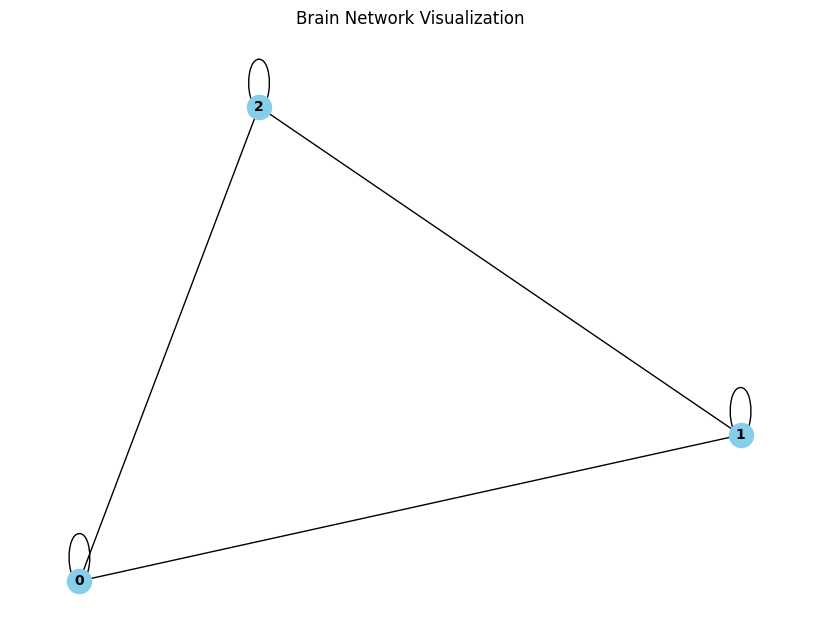

Node 0: Degree Centrality = 2.0
Node 1: Degree Centrality = 2.0
Node 2: Degree Centrality = 2.0


In [ ]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

selected_features = ['MMSE', 'CDR', 'Age']

# Subsetting the data with selected features
selected_data = disease2[selected_features]

# Calculate connectivity matrices (example: using correlation)
connectivity_matrices = np.corrcoef(selected_data.T)

# Create a graph from the connectivity matrix
G = nx.from_numpy_array(connectivity_matrices)

# Analyze network properties
# For example, degree centrality
degree_centrality = nx.degree_centrality(G)

# Visualize the graph
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_size=300, node_color='skyblue', font_size=10, font_weight='bold')
plt.title('Brain Network Visualization')
plt.show()

# Print degree centrality for each node
for node, centrality in degree_centrality.items():
    print(f"Node {node}: Degree Centrality = {centrality}")


#Structural Connectivity Analysis

This aspect of brain connectivity analysis examines the anatomical connections between different brain regions. It is used to visualize and quantify the white matter tracts that facilitate communication between neurons. Structural connectivity analysis helps identify abnormalities in the brain's wiring architecture, such as disrupted axonal integrity or reduced fiber density, which may be indicative of neurodegenerative diseases like Alzheimer's.

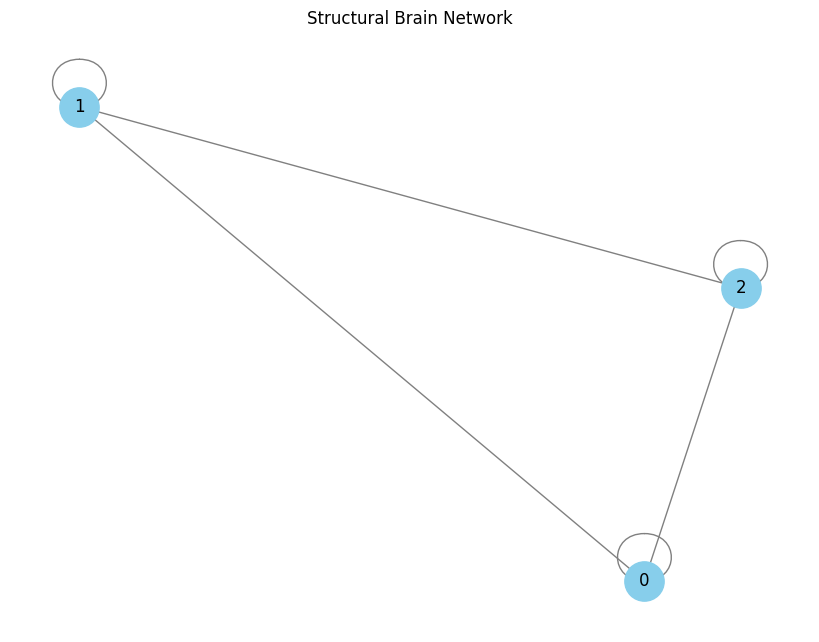

In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt



# Create a graph object from the adjacency matrix
G = nx.Graph(connectivity_matrices)

# Visualize the structural brain network
plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=800, edge_color='gray')
plt.title('Structural Brain Network')
plt.show()


##Graph Theory Analysis

Brain connectivity analysis often employs graph theory principles to characterize the topological properties of brain networks. Graph theory provides mathematical tools for quantifying network properties such as node degree, clustering coefficient, and network efficiency. By applying graph theory metrics to structural and functional connectivity data, researchers can assess the organization and efficiency of brain networks in health and disease. In Alzheimer's disease, alterations in network topology, such as decreased network efficiency or increased path length, may indicate progressive network degeneration and cognitive decline.

In [ ]:
import pandas as pd
import networkx as nx
# Selecting the relevant features for connectivity analysis
selected_featuress = ['MMSE', 'CDR', 'Age']

# Subset the data with selected features
selected_dataa= disease2[selected_featuress]

# Calculate connectivity matrices (example: using correlation)
connectivity_matrix = np.corrcoef(selected_dataa.T)

# Create a graph from the connectivity matrix
G = nx.from_numpy_array(connectivity_matrix)

# Perform graph theory analysis
# Here are some example metrics you can compute
# You can choose metrics based on your research objectives
average_clustering_coefficient = nx.average_clustering(G)
shortest_path_length = nx.average_shortest_path_length(G)
degree_centralityy = nx.degree_centrality(G)

# Print or analyze the computed metrics as per your research goals

# Example of printing metrics
print("Average Clustering Coefficient:", average_clustering_coefficient)
print("Average Shortest Path Length:", shortest_path_length)
print("Degree Centrality:", degree_centralityy)


Average Clustering Coefficient: 1.0
Average Shortest Path Length: 1.0
Degree Centrality: {0: 2.0, 1: 2.0, 2: 2.0}


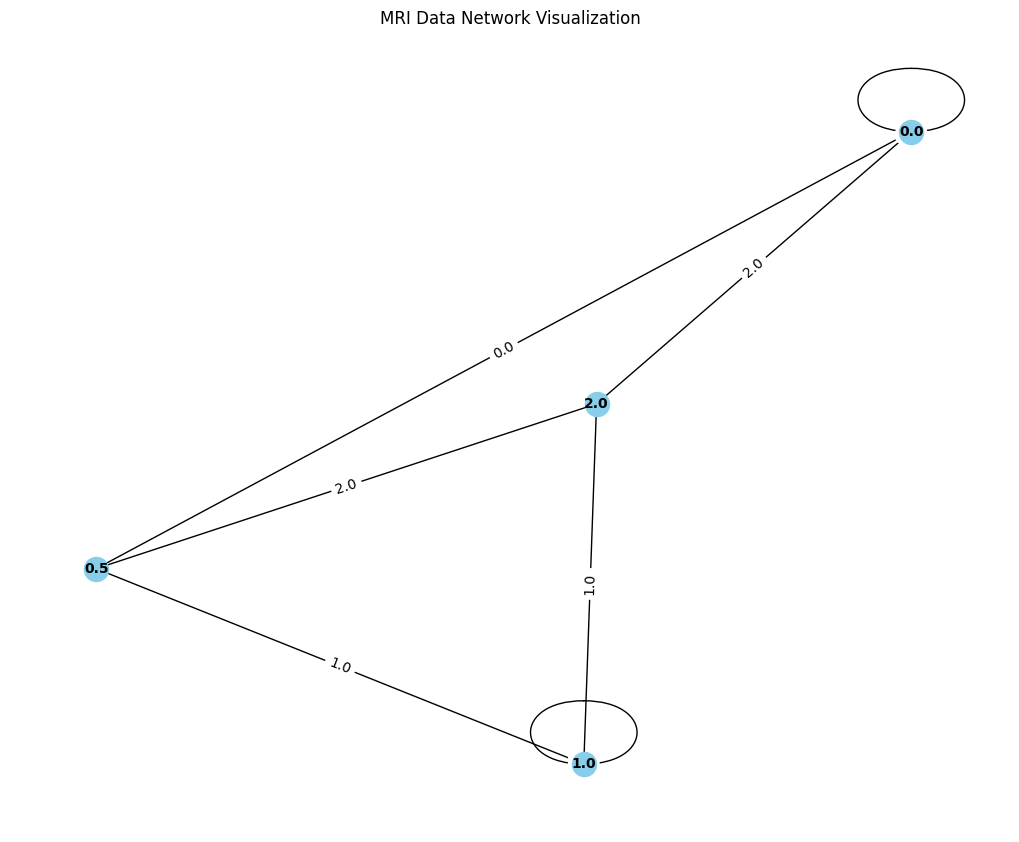

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


# Creating a graph
G = nx.Graph()

# Adding nodes from 'CDR' column
G.add_nodes_from(disease2['CDR'])

# Add edges with weights
for index, row in disease2.iterrows():
    G.add_edge(row['CDR'], row['Group'], weight=row['Group'])

# Visualize the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=300, node_color='skyblue', font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('MRI Data Network Visualization')
plt.show()


##Connectome Mapping

Connectomics refers to the comprehensive mapping and analysis of brain connectivity patterns across the entire brain. Connectome studies aim to create detailed maps of structural and functional connections, delineating the intricate network architecture underlying brain function. In Alzheimer's research, connectome mapping helps elucidate the spatial distribution of connectivity disruptions and identify key network hubs or regions vulnerable to neurodegeneration.

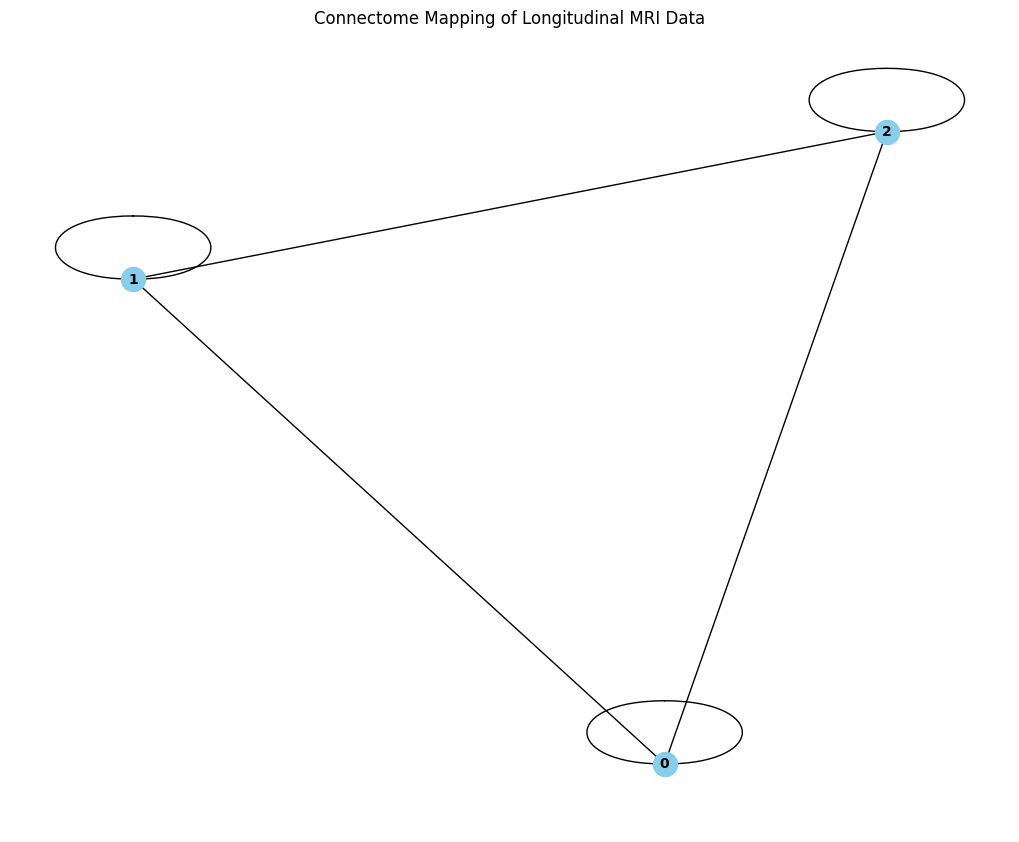

In [ ]:

selectedd_features = ['eTIV', 'nWBV', 'ASF']

# Subset the data with selected features
selectedd_data = disease2[selectedd_features]

# Calculate connectivity matrices (example: using correlation)
connectivity_matricess = np.corrcoef(selectedd_data.T)

# Create a graph from the connectivity matrix
G = nx.from_numpy_array(connectivity_matricess)

# Visualize the connectome
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # Positions for all nodes
nx.draw(G, pos, with_labels=True, node_size=300, node_color='skyblue', font_size=10, font_weight='bold')
plt.title('Connectome Mapping of Longitudinal MRI Data')
plt.show()
